# Metric plots
This notebook generates the plots for the final paper.

It loads the datasets from all 3 models.
Each model is trained on the Waseem and Hovy (2016) dataset and evaluated on two test datasets:

1. Waseem and Hovy (2016): to simulate seen data.
2. SemEval (2019): to simulate unseen data.

### Metric results (all survey values)
The plots below do take all values of TP, TN, FP, FN, and Rejection into account.

In [1]:
from rejector.prediction import Prediction
from rejector.values import Values
from rejector.metric import Metric
import seaborn as sns

values = Values(value_TP=18.149543604085686, value_TN=36.31953463203463, value_FP=16.68669949423102, value_FN=28.08375563063063,value_rejection=4.82167904290429)

predictions = Prediction.load("input/lr-waseem-waseem.p", gold_class="Hate")
metric_lr_waseem_waseem = Metric(values, predictions)
predictions = Prediction.load("input/lr-waseem-semeval.p", gold_class="Hate")
metric_lr_waseem_semeval = Metric(values, predictions)
predictions = Prediction.load("input/distilbert-waseem-waseem.p", gold_class="Hate")
metric_distilbert_waseeem_waseem = Metric(values, predictions)
predictions = Prediction.load("input/distilbert-waseem-semeval.p", gold_class="Hate")
metric_distilbert_waseeem_semeval = Metric(values, predictions)
predictions = Prediction.load("input/cnn-waseem-waseem.p", gold_class="Hate")
metric_cnn_waseeem_waseem = Metric(values, predictions)
predictions = Prediction.load("input/cnn-waseem-semeval.p", gold_class="Hate")
metric_cnn_waseeem_semeval = Metric(values, predictions)

lr_seen = ("LR", metric_lr_waseem_waseem)
distilbert_seen = ("DistilBERT", metric_distilbert_waseeem_waseem)
cnn_seen = ("CNN", metric_cnn_waseeem_waseem)

lr_unseen = ("LR", metric_lr_waseem_semeval)
distilbert_unseen = ("DistilBERT", metric_distilbert_waseeem_semeval)
cnn_unseen = ("CNN", metric_cnn_waseeem_semeval)

metrics_seen = [lr_seen, distilbert_seen, cnn_seen]
metrics_unseen = [lr_unseen, distilbert_unseen, cnn_unseen]

c:\Users\phili\anaconda3\envs\smart-rejector\lib\site-packages\statsmodels\nonparametric\kernel_density.py:158: RuntimeWarning: invalid value encountered in log
  L += func(f_i)
c:\Users\phili\anaconda3\envs\smart-rejector\lib\site-packages\statsmodels\nonparametric\kernel_density.py:158: RuntimeWarning: divide by zero encountered in log
  L += func(f_i)


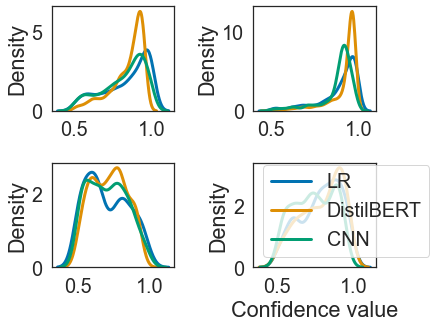

In [8]:
sns.set(rc={'figure.figsize':(6,5)})
sns.set(font_scale = 1.8, palette="colorblind")
sns.set_style("white")
Metric.plot_multiple_confidence_densities(metrics=metrics_seen, bw_adjust=0.8, filename="confidence-densities.pdf", show_yaxis_title=True)

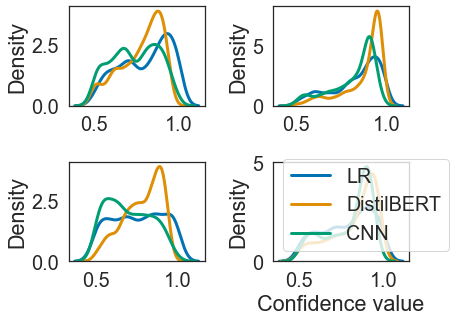

In [9]:
sns.set(rc={'figure.figsize':(6,5)})
sns.set(font_scale = 1.8, palette="colorblind")
sns.set_style("white")
Metric.plot_multiple_confidence_densities(metrics=metrics_unseen, bw_adjust=0.8, filename="confidence-densities.pdf", show_yaxis_title=True)